In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

In [4]:
# URL for raw file
csv_url = 'https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv'

In [5]:
# Estimated populations for Cherokee and Davidson (TN) taken from Wikipedia
cher_pop = 48675
dav_pop = 694144

In [6]:
df = pd.read_csv(csv_url)
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [7]:
# Dataframe with all oklahoma counties
okla_df = df[df['state'] == 'Oklahoma']

# Dataframe with just cherokee county data
cherokee_df = okla_df[okla_df['county'] == 'Cherokee']
cherokee_df.reset_index(inplace = True, drop = True)

cherokee_df.head()

,date,county,state,fips,cases,deaths
0,2020-03-27,Cherokee,Oklahoma,40021.0,1,0
1,2020-03-28,Cherokee,Oklahoma,40021.0,1,0
2,2020-03-29,Cherokee,Oklahoma,40021.0,1,0
3,2020-03-30,Cherokee,Oklahoma,40021.0,1,0
4,2020-03-31,Cherokee,Oklahoma,40021.0,4,0


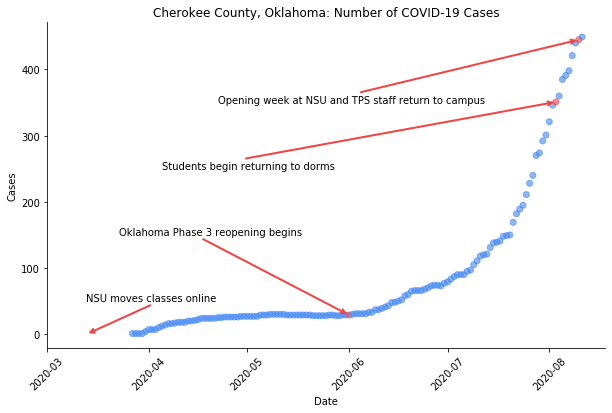

In [32]:
notes = {'nsucloses' : dt.datetime(2020, 3, 13),
         'reopening' : dt.datetime(2020, 6, 1),
         'movein' : dt.datetime(2020, 8, 3),
         'firstweek' : dt.datetime(2020, 8, 10),
         'nsustarts' : dt.datetime(2020, 8, 17),
         'tpsstarts' : dt.datetime(2020, 8, 27)}

# Points with a note will be plotted in red
colors = np.array(['#4287f5' for i in range(cherokee_df.shape[0])])
for i in range(len(colors)):
    if cherokee_df.iloc[i, 0] in set(notes.values()):
        colors[i] = '#f54242'

# Create plot
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(cherokee_df['date'], cherokee_df['cases'], color = colors, alpha = 0.6)
#ax.plot(cherokee_df['date'], cherokee_df['cases'], alpha = 0.6)
plt.title('Cherokee County, Oklahoma: Number of COVID-19 Cases')
plt.ylabel('Cases')
plt.xlabel('Date')
plt.xticks(rotation = 45)
ax.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate arrows
plt.annotate('',
             xy=(mdates.date2num(notes['nsucloses']), 0),
             xytext=(mdates.date2num(notes['nsucloses']) + 20, 45),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['reopening']), 29),
             xytext=(mdates.date2num(notes['reopening']) - 45, 145),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['movein']), 351),
             xytext=(mdates.date2num(notes['movein']) - 95, 265),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['firstweek']), 445),
             xytext=(mdates.date2num(notes['movein']) - 60, 365),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

# Text notes
plt.text(mdates.date2num(notes['nsucloses']), 50, 'NSU moves classes online')
plt.text(mdates.date2num(notes['reopening']) - 70, 150, 'Oklahoma Phase 3 reopening begins')
plt.text(mdates.date2num(notes['movein']) - 120, 250, 'Students begin returning to dorms')
plt.text(mdates.date2num(notes['firstweek']) - 110, 350, 'Opening week at NSU and TPS staff return to campus')

fig.savefig('cherokee_cases' + str(dt.date.today()) + '.png', bbox_inches = 'tight')
plt.show()

In [9]:
# Calculate the daily increase in cases
daily_increase = [0 for i in range(cherokee_df.shape[0])]
daily_increase[0] = 1
for i in range(1,cherokee_df.shape[0]):
    daily_increase[i] = cherokee_df.loc[i, 'cases'] - cherokee_df.loc[i-1, 'cases']

# Add daily increase column to dataframe
cherokee_df['increase'] = daily_increase

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


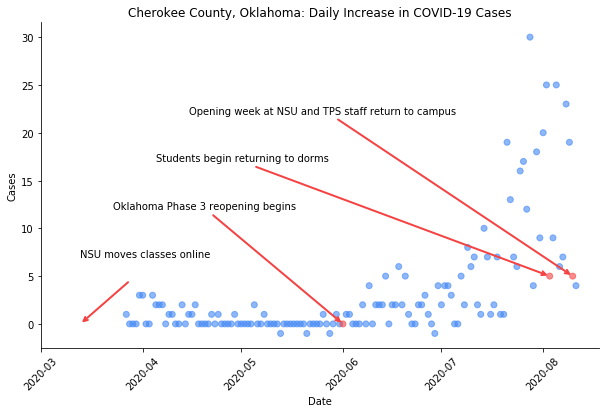

In [31]:
# Create plot of daily increases
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(cherokee_df['date'], cherokee_df['increase'], color = colors, alpha = 0.6)
#ax.plot(cherokee_df['date'], cherokee_df['increase'], alpha = 0.6)
plt.title('Cherokee County, Oklahoma: Daily Increase in COVID-19 Cases')
plt.ylabel('Cases')
plt.xlabel('Date')
plt.xticks(rotation = 45)
ax.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate arrows
plt.annotate('',
             xy=(mdates.date2num(notes['nsucloses']), 0),
             xytext=(mdates.date2num(notes['nsucloses']) + 15, 4.5),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['reopening']), 0),
             xytext=(mdates.date2num(notes['reopening']) - 40, 11.5),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['movein']), 5),
             xytext=(mdates.date2num(notes['movein']) - 90, 16.5),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['firstweek']), 5),
             xytext=(mdates.date2num(notes['movein']) - 65, 21.5),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

# Text notes
plt.text(mdates.date2num(notes['nsucloses']), 7, 'NSU moves classes online')
plt.text(mdates.date2num(notes['reopening']) - 70, 12, 'Oklahoma Phase 3 reopening begins')
plt.text(mdates.date2num(notes['movein']) - 120, 17, 'Students begin returning to dorms')
plt.text(mdates.date2num(notes['firstweek']) - 117, 22, 'Opening week at NSU and TPS staff return to campus')

fig.savefig('cherokee_increases' + str(dt.date.today()) + '.png', bbox_inches = 'tight')
plt.show()

In [11]:
# Create a per capita column in cherokee dataframe
cherokee_df['per capita'] = cherokee_df['cases']/cher_pop

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# Create dataframe with TN data
ten_df = df[df['state'] == 'Tennessee']

# Create dataframe with Davidson County, TN data
davidson_df = ten_df[ten_df['county'] == 'Davidson']
davidson_df.reset_index(drop = True, inplace = True)

# Create per capita column
davidson_df['per capita'] = davidson_df['cases']/dav_pop

davidson_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,date,county,state,fips,cases,deaths,per capita
0,2020-03-08,Davidson,Tennessee,47037.0,1,0,0.000001
1,2020-03-09,Davidson,Tennessee,47037.0,1,0,0.000001
2,2020-03-10,Davidson,Tennessee,47037.0,1,0,0.000001
3,2020-03-11,Davidson,Tennessee,47037.0,2,0,0.000003
4,2020-03-12,Davidson,Tennessee,47037.0,6,0,0.000009


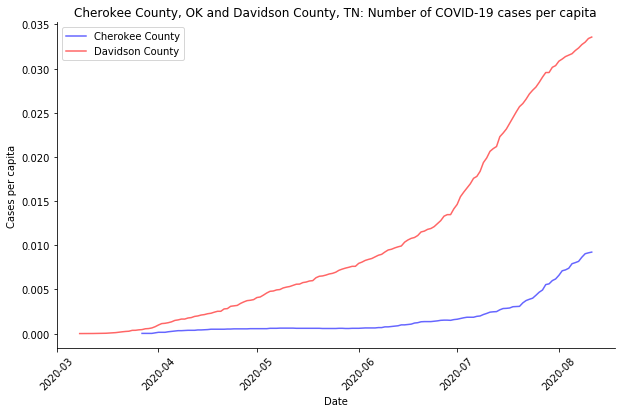

In [27]:
# Create plot of per capita data
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(cherokee_df['date'], cherokee_df['per capita'], color = 'blue', alpha = 0.6, label = 'Cherokee County')
ax.plot(davidson_df['date'], davidson_df['per capita'], color = 'red', alpha = 0.6, label = 'Davidson County')
plt.title('Cherokee County, OK and Davidson County, TN: Number of COVID-19 cases per capita')
plt.ylabel('Cases per capita')
plt.xlabel('Date')
plt.xticks(rotation = 45)
ax.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

fig.savefig('cher_vs_dav' + str(dt.date.today()) + '.png', bbox_inches = 'tight')
plt.show()